<a href="https://colab.research.google.com/github/cil4/inmersion_datos_AluraLatam/blob/main/Ejercicio_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles_bogota.csv') 
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [ ]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
3083,Apartamento,Apartamento en venta en Kennedy,2,1,39,Kennedy,Kennedy Central,$ 163.500.000
9338,Apartamento,Apartamento en venta en Chapinero,3,2,140,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 779.000.000
3878,Apartamento,Apartamento en venta en San Patricio,2,3,95,San Patricio,USAQUÉN: Country Club + Santa Bárbara,$ 650.000.000
2229,Casa,Casa en venta en Engativa,4,3,150,Engativa,Engativá,$ 199.900.000
3420,Apartamento,Apartamento en venta en El Plan,3,3,135,El Plan,El Rincón,$ 550.000.000
8704,Apartamento,Apartamento en venta en Quinta Camacho,2,2,102,Quinta Camacho,CHAPINERO: Chicó Lago + El Refugio,$ 320.000.000
1915,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,78,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 270.000.000
4341,Apartamento,Apartamento en venta en Barrios Unidos,3,2,75,Barrios Unidos,Los Andes,$ 439.000.000
3708,Apartamento,Apartamento en venta en Santa Fe,1,1,51,Santa Fe,SANTA FE: Las Nieves + Sagrado Corazón,$ 207.200.000
8482,Oficina/Consultorio,Oficina/Consultorio en venta en Santa Barbara,3,2,92,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 1.050.000.000


In [ ]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
6233,Apartamento,Apartamento en venta en Chapinero Central,1,1,36,Chapinero Central,Localidad Chapinero resto,$ 203.823.000,$,203.823.000
232,Apartamento,Apartamento en venta en Cedritos,1,2,48,Cedritos,Usaquén,$ 308.000.000,$,308.000.000
1971,Apartamento,Apartamento en venta en Barrios Unidos,4,4,137,Barrios Unidos,Los Andes,$ 298.500.000,$,298.500.000


In [ ]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [ ]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000


In [ ]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


Desafíos

Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

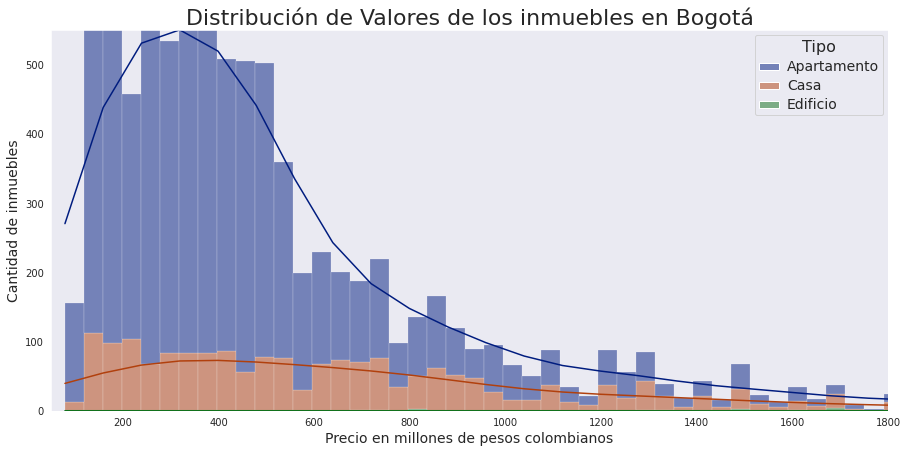

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

sns.set_palette('dark')
filtro_inmuebles = inmuebles.query('Tipo in["Apartamento", "Edificio", "Casa"]')

plt.figure(figsize=(15,7))
grafica = sns.histplot(data=filtro_inmuebles, x='Precio_Millon', kde=True, hue='Tipo', multiple='stack')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá', fontsize='22')
grafica.set_xlabel('Precio en millones de pesos colombianos', fontsize='14')
grafica.set_ylabel('Cantidad de inmuebles', fontsize='14')
plt.xlim((50,1800))
plt.ylim((0,550))

plt.setp(grafica.get_legend().get_texts(), fontsize='14')  
plt.setp(grafica.get_legend().get_title(), fontsize='16') 
plt.savefig('/content/drive/MyDrive/inmersion_datos/valor_inmuebles-desafio.png',format='png')
plt.show()

Del gráfico realizado podemos visualizar que a mayor precio la disponibilidad y oferta de los inmuebles mencionados decrecen, en el caso del tipo 'apartamento' su descenso es notorio y pronunciado, mientras que en el tipo 'casa' el descenso se realiza de manera más estable.


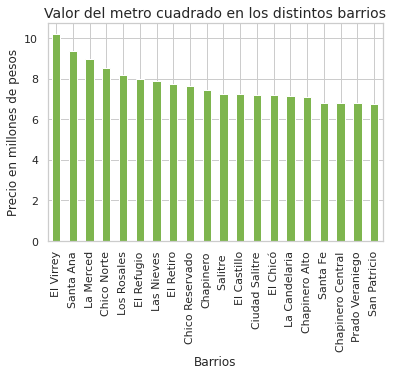

In [ ]:
inmuebles['m2'] = inmuebles['Precio_Millon'] / inmuebles['Area']
barrio_precio_m2 = inmuebles.groupby('Barrio')['m2'].mean().sort_values(ascending=False)
grafica= barrio_precio_m2.head(20).plot.bar('Barrio', 'm2',  color='#7eb54e')
grafica.set_title('Valor del metro cuadrado en los distintos barrios', fontsize=14)
plt.ylabel('Precio en millones de pesos', fontsize=12)
plt.xlabel('Barrios', fontsize=12);
plt.savefig('/content/drive/MyDrive/inmersion_datos/valor_m2_barrios-desafio.png',format='png')

 

